# CREDIT FRAUD ANALYSIS THROUGH PYTHON

# Packages Used

In [1]:
# data analysis and wrangling
import arff
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc, roc_auc_score
from graphviz import Source
from IPython.display import SVG

Dataset is available in an arff file which needs to be converted into a dataframe for our analysis. To see the arff file format refer appendix.

# Data Pre-processing

## Creating a dataframe from arff file

In [2]:
#load the data in arff file as list
list_data = list(arff.load('/Users/admin/gitproject/credit_fruad.arff'))
#convert the list into dataframe
df = pd.DataFrame(list_data)
#have a look at the first 3 rows of the dataframe
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,'0<=X<200',48.0,'existing paid',radio/tv,5951.0,'<100','1<=X<4',2.0,'female div/dep/mar',none,...,'real estate',22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',education,2096.0,'<100','4<=X<7',2.0,'male single',none,...,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,good


In [3]:
#know the dimensions of the dataframe created
df.shape

(1000, 21)

In [4]:
#create a list with the names of columns to be given to the dataframe
names = ["over_draft", "credit_usage", "credit_history", "purpose", "current_balance", "Average_Credit_Balance", "employment", "location", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]

In [5]:
#assign the list of column names to the dataframe
df.columns = names
#have a look at the changes made to the dataframe
df.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good


The dataframe with few rows is attached in appendix to have a look.

In [6]:
#know the distribution of class variable as to how many loan applicants are good and how many are bad
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [7]:
#know the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

This tells us there are no null values in our dataset. If there were missing values, we would have to assign dummy values in order to have a complete dataframe. Otherwise the tests cannot be applied for analysis when there are NaN values.

## Checking for categories existing in numerical variables

In [8]:
df['credit_usage'].nunique()
#this is a continuous variable

33

In [9]:
df['current_balance'].nunique()
# This variable is not very useful because average_credit_balance variable already exists

921

In [10]:
#deleting the 'current_balance' column
df.drop('current_balance',axis=1,inplace=True)

In [11]:
print(df['location'].nunique())
df['location'].value_counts()
# There exists a category here with values [1,2,3,4]

4


4.0    476
2.0    231
3.0    157
1.0    136
Name: location, dtype: int64

In [12]:
print(df['residence_since'].nunique())
df['residence_since'].value_counts()
# There exists a category here with values [1,2,3,4] 

4


4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64

In [13]:
df['cc_age'].nunique()
#this is a continuous variable

53

In [14]:
print(df['existing_credits'].nunique())
df['existing_credits'].value_counts()
# There exists a category here with values [1,2,3,4]

4


1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64

In [15]:
print(df['num_dependents'].nunique())
df['num_dependents'].value_counts()
# There exists a category here with values [1,2]

2


1.0    845
2.0    155
Name: num_dependents, dtype: int64

## Changing class variable from text to numerical categories

We change the class variable as 0 = good and 1 = bad using if statement inside function and then apply command.

In [16]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [17]:
def if_func_class (row):
        c = row['class']
        if c == 'good':
            return 0
        else:
            return 1

In [18]:
df["class"] = df.apply(if_func_class, axis = "columns")

## Converting categorical variables to numerical values

In [19]:
#making a copy of the dataframe to convert it into numeric values for categories
df_num = df.copy()

### over_draft

In [20]:
df_num["over_draft"].unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [21]:
def if_func_od (row):
        od = row['over_draft']
        if od == "'no checking'":
            return 1
        elif od == "'<0'":
            return 2
        elif od == "'0<=X<200'":
            return 3
        else:
            return 4

In [22]:
df_num["over_draft"] = df_num.apply(if_func_od, axis = "columns")

### credit_history

In [23]:
df_num["credit_history"].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"], dtype=object)

In [24]:
def if_func_ch (row):
        ch = row['credit_history']
        if ch == "'no credits/all paid'":
            return 1
        elif ch == "'all paid'":
            return 2
        elif ch == "'existing paid'":
            return 3
        elif ch == "'delayed previously'":
            return 4
        else:
            return 5

In [25]:
df_num["credit_history"] = df_num.apply(if_func_ch, axis = "columns")

### purpose

In [26]:
df_num["purpose"].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [27]:
def if_func_purpose (row):
        pr = row['purpose']
        if pr == "radio/tv":
            return 1
        elif pr == "education":
            return 2
        elif pr == "furniture/equipment":
            return 3
        elif pr == "'new car'":
            return 4
        elif pr == "'used car'":
            return 5
        elif pr == "business":
            return 6
        elif pr == "'domestic appliance'":
            return 7
        elif pr == "repairs":
            return 8
        elif pr == "retraining":
            return 9
        else:
            return 10

In [28]:
df_num["purpose"] = df_num.apply(if_func_purpose, axis = "columns")

### Average_Credit_Balance

In [29]:
df_num["Average_Credit_Balance"].unique()

array(["'no known savings'", "'<100'", "'500<=X<1000'", "'>=1000'",
       "'100<=X<500'"], dtype=object)

In [30]:
def if_func_acb (row):
        acb = row['Average_Credit_Balance']
        if acb == "'<100'":
            return 1
        elif acb == "'100<=X<500'":
            return 2
        elif acb == "'500<=X<1000'":
            return 3
        elif acb == "'>=1000'":
            return 4
        else:
            return 5

In [31]:
df_num["Average_Credit_Balance"] = df_num.apply(if_func_acb, axis = "columns")

### employment

In [32]:
df_num["employment"].unique()

array(["'>=7'", "'1<=X<4'", "'4<=X<7'", 'unemployed', "'<1'"], dtype=object)

In [33]:
def if_func_employment (row):
        ep = row['employment']
        if ep == "'<1'":
            return 1
        elif ep == "'1<=X<4'":
            return 2
        elif ep == "'4<=X<7'":
            return 3
        elif ep == "'>=7'":
            return 4
        else:
            return 5

In [34]:
df_num["employment"] = df_num.apply(if_func_employment, axis = "columns")

### personal_status

In [35]:
df_num["personal_status"].unique()

array(["'male single'", "'female div/dep/mar'", "'male div/sep'",
       "'male mar/wid'"], dtype=object)

In [36]:
def if_func_ps (row):
        ps = row['personal_status']
        if ps == "'female div/dep/mar'":
            return 1
        elif ps == "'male single'":
            return 2
        elif ps == "'male mar/wid'":
            return 3
        else:
            return 4

In [37]:
df_num["personal_status"] = df_num.apply(if_func_ps, axis = "columns")

### other_parties

In [38]:
df_num["other_parties"].unique()

array(['none', 'guarantor', "'co applicant'"], dtype=object)

In [39]:
def if_func_op (row):
        op = row['other_parties']
        if op == 'guarantor':
            return 1
        elif op == "'co applicant'":
            return 2
        else:
            return 3

In [40]:
df_num["other_parties"] = df_num.apply(if_func_op, axis = "columns")

### property_magnitude

In [41]:
df_num["property_magnitude"].unique()

array(["'real estate'", "'life insurance'", "'no known property'", 'car'], dtype=object)

In [42]:
def if_func_pm (row):
        pm = row['property_magnitude']
        if pm == 'car':
            return 1
        elif pm == "'life insurance'":
            return 2
        elif pm == "'real estate'":
            return 3
        else:
            return 4

In [43]:
df_num["property_magnitude"] = df_num.apply(if_func_pm, axis = "columns")

### other_payment_plans

In [44]:
df_num["other_payment_plans"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [45]:
def if_func_opp (row):
        opp = row['other_payment_plans']
        if opp == 'bank':
            return 1
        elif opp == 'stores':
            return 2
        else:
            return 3

In [46]:
df_num["other_payment_plans"] = df_num.apply(if_func_opp, axis = "columns")

### housing

In [47]:
df_num["housing"].unique()

array(['own', "'for free'", 'rent'], dtype=object)

In [48]:
def if_func_housing (row):
        h = row['housing']
        if h == 'own':
            return 1
        elif h == 'rent':
            return 2
        else:
            return 3

In [49]:
df_num["housing"] = df_num.apply(if_func_housing, axis = "columns")

### job

In [50]:
df_num["job"].unique()

array(['skilled', "'unskilled resident'", "'high qualif/self emp/mgmt'",
       "'unemp/unskilled non res'"], dtype=object)

In [51]:
def if_func_job (row):
        j = row['job']
        if j == "'unemp/unskilled non res'":
            return 1
        elif j == "'unskilled resident'":
            return 2
        elif j == 'skilled':
            return 3
        else:
            return 4

In [52]:
df_num["job"] = df_num.apply(if_func_job, axis = "columns")

### own_telephone

In [53]:
df_num["own_telephone"].unique()

array(['yes', 'none'], dtype=object)

In [54]:
def if_func_ot (row):
        ot = row['own_telephone']
        if ot == 'yes':
            return 0
        else:
            return 1

In [55]:
df_num["own_telephone"] = df_num.apply(if_func_ot, axis = "columns")

### foreign_worker

In [56]:
df_num["foreign_worker"].unique()

array(['yes', 'no'], dtype=object)

In [57]:
def if_func_fw (row):
        fw = row['foreign_worker']
        if fw == 'no':
            return 0
        else:
            return 1

In [58]:
df_num["foreign_worker"] = df_num.apply(if_func_fw, axis = "columns")

## Changing specific columns to category data type

In [59]:
df_num.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'Average_Credit_Balance', 'employment', 'location', 'personal_status',
       'other_parties', 'residence_since', 'property_magnitude', 'cc_age',
       'other_payment_plans', 'housing', 'existing_credits', 'job',
       'num_dependents', 'own_telephone', 'foreign_worker', 'class'],
      dtype='object')

In [60]:
for col in ['over_draft', 'credit_history', 'purpose',
       'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class']:
    df_num[col] = df_num[col].astype('category')

In [61]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
over_draft                1000 non-null category
credit_usage              1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
Average_Credit_Balance    1000 non-null category
employment                1000 non-null category
location                  1000 non-null category
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null category
property_magnitude        1000 non-null category
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null category
job                       1000 non-null category
num_dependents            1000 non-null category
own_telephone             1000 non-null category
foreign_worker

## Splitting test and train dataframe (df_num)

train_df, test_df = train_test_split(df_num, test_size=0.2)

Creating files in the local system as train.csv and test.csv

train_df.to_csv('/Users/admin/gitproject/train.csv')

test_df.to_csv('/Users/admin/gitproject/test.csv')

# Data Analysis

## Checking the distribution of categorical features along with continuous

In [62]:
a = df.describe(include='all')
a

,over_draft,credit_usage,credit_history,purpose,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,'no checking',NaN,'existing paid',radio/tv,'<100','1<=X<4',NaN,'male single',none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,NaN
freq,394,NaN,530,280,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.300000
std,NaN,12.058814,NaN,NaN,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000


In [63]:
a.loc['%',:] = a.loc['freq',:]/a.loc['count',:]*100
a

,over_draft,credit_usage,credit_history,purpose,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,'no checking',NaN,'existing paid',radio/tv,'<100','1<=X<4',NaN,'male single',none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,NaN
freq,394,NaN,530,280,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.300000
std,NaN,12.058814,NaN,NaN,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000


## Analyzing by pivoting features

Now we analyze all the categorical variables, one by one, to know the proportion of bad creditors within each category. We do this by using the groupby command and we take out the mean. This is possible because we have given the value for bad creditors as 1 and good creditors as 0. The reason for keeping bad creditors as 1 and not good creditors as 1 is because we are intrested in analysing and predicting the defaulters from our data. So through this command, the sum of bad creditors within a particular category are divided with the total count of good and bad creditors in that category.

In [64]:
#over_draft
df[['over_draft', 'class']].groupby(['over_draft'], as_index=False).mean().sort_values(by='class', ascending=False)

,over_draft,class
1,'<0',0.492701
0,'0<=X<200',0.390335
2,'>=200',0.222222
3,'no checking',0.116751


In [65]:
#credit_history
df[['credit_history', 'class']].groupby(['credit_history'], as_index=False).mean().sort_values(by='class', ascending=False)

,credit_history,class
4,'no credits/all paid',0.625000
0,'all paid',0.571429
3,'existing paid',0.318868
2,'delayed previously',0.318182
1,'critical/other existing credit',0.170648


In [66]:
#purpose
df[['purpose', 'class']].groupby(['purpose'], as_index=False).mean().sort_values(by='class', ascending=False)

,purpose,class
4,education,0.440000
6,other,0.416667
1,'new car',0.380342
8,repairs,0.363636
3,business,0.350515
0,'domestic appliance',0.333333
5,furniture/equipment,0.320442
7,radio/tv,0.221429
2,'used car',0.165049
9,retraining,0.111111


In [67]:
#Average_Credit_Balance
df[['Average_Credit_Balance', 'class']].groupby(['Average_Credit_Balance'], as_index=False).mean().sort_values(by='class', ascending=False)

,Average_Credit_Balance,class
2,'<100',0.359867
0,'100<=X<500',0.330097
4,'no known savings',0.174863
1,'500<=X<1000',0.174603
3,'>=1000',0.125000


In [68]:
#employment
df[['employment', 'class']].groupby(['employment'], as_index=False).mean().sort_values(by='class', ascending=False)

,employment,class
2,'<1',0.406977
4,unemployed,0.370968
0,'1<=X<4',0.306785
3,'>=7',0.252964
1,'4<=X<7',0.224138


In [69]:
#location
df[['location', 'class']].groupby(['location'], as_index=False).mean().sort_values(by='class', ascending=False)

,location,class
3,4.0,0.334034
2,3.0,0.286624
1,2.0,0.268398
0,1.0,0.250000


In [70]:
#personal_status
df[['personal_status', 'class']].groupby(['personal_status'], as_index=False).mean().sort_values(by='class', ascending=False)

,personal_status,class
1,'male div/sep',0.400000
0,'female div/dep/mar',0.351613
2,'male mar/wid',0.271739
3,'male single',0.266423


In [71]:
#other_parties
df[['other_parties', 'class']].groupby(['other_parties'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_parties,class
0,'co applicant',0.439024
2,none,0.299890
1,guarantor,0.192308


In [72]:
#residence_since
df[['residence_since', 'class']].groupby(['residence_since'], as_index=False).mean().sort_values(by='class', ascending=False)

,residence_since,class
1,2.0,0.314935
3,4.0,0.300242
2,3.0,0.288591
0,1.0,0.276923


In [73]:
#property_magnitude
df[['property_magnitude', 'class']].groupby(['property_magnitude'], as_index=False).mean().sort_values(by='class', ascending=False)

,property_magnitude,class
1,'no known property',0.435065
3,car,0.307229
0,'life insurance',0.306034
2,'real estate',0.212766


In [74]:
#other_payment_plans
df[['other_payment_plans', 'class']].groupby(['other_payment_plans'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_payment_plans,class
0,bank,0.410072
2,stores,0.404255
1,none,0.275184


In [75]:
#housing
df[['housing', 'class']].groupby(['housing'], as_index=False).mean().sort_values(by='class', ascending=False)

,housing,class
0,'for free',0.407407
2,rent,0.391061
1,own,0.260870


In [76]:
#existing_credits
df[['existing_credits', 'class']].groupby(['existing_credits'], as_index=False).mean().sort_values(by='class', ascending=False)

,existing_credits,class
3,4.0,0.333333
0,1.0,0.315956
1,2.0,0.276276
2,3.0,0.214286


In [77]:
#job
df[['job', 'class']].groupby(['job'], as_index=False).mean().sort_values(by='class', ascending=False)

,job,class
0,'high qualif/self emp/mgmt',0.344595
1,'unemp/unskilled non res',0.318182
3,skilled,0.295238
2,'unskilled resident',0.280000


In [78]:
#num_dependents
df[['num_dependents', 'class']].groupby(['num_dependents'], as_index=False).mean().sort_values(by='class', ascending=False)

,num_dependents,class
0,1.0,0.300592
1,2.0,0.296774


In [79]:
#own_telephone
df[['own_telephone', 'class']].groupby(['own_telephone'], as_index=False).mean().sort_values(by='class', ascending=False)

,own_telephone,class
0,none,0.313758
1,yes,0.279703


In [80]:
#foreign_worker
df[['foreign_worker', 'class']].groupby(['foreign_worker'], as_index=False).mean().sort_values(by='class', ascending=False)

,foreign_worker,class
1,yes,0.307373
0,no,0.108108


Few important obervations :
Variables like credit_history, employment, other_parties, property_magnitude and foriegn_worker seem to have more impact on the class for few categories within the variable than others. So prediction could be made according to these variables.

## Analysis taking all the variables

In [81]:
train = pd.read_csv('/Users/admin/gitproject/train.csv')

In [82]:
test = pd.read_csv('/Users/admin/gitproject/test.csv')

In [83]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [84]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
test.shape

(200, 20)

In [86]:
X_train = train.drop("class", axis=1)
Y_train = train["class"]
X_test  = test.drop("class", axis=1)
Y_test = test["class"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [87]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(logreg.coef_)
print(logreg.intercept_)
Y_pred_logi = logreg.predict(X_test)

[[ 0.28463312  0.03377331 -0.43154865  0.01810301 -0.31258964 -0.14447055
   0.26291386  0.02705024  0.17809431  0.06469972 -0.03207267 -0.00972981
  -0.32597796  0.26655466  0.13763808 -0.02836999  0.16751143  0.19545118
   0.37313506]]
[-1.23402706]


0.641544117647
0.641544117647


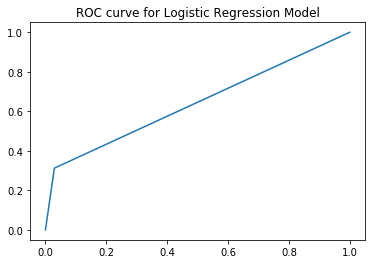

In [88]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_logi)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test, Y_pred_logi))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Logistic Regression Model")
plt.show()

In [89]:
cm_logi = pd.crosstab(Y_test, Y_pred_logi, rownames=['True'], colnames=['Predicted'], margins=True)
cm_logi

Predicted,0,1,All
True,,,
0,132,4,136
1,44,20,64
All,176,24,200


In [90]:
cost_logi = cm_logi.iloc[1,0]*5 + cm_logi.iloc[0,1]*1
cost_logi

224

In [91]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train, Y_train)
Y_pred_deci = decision_tree.predict(X_test)


Plotting the Decision Tree

graph = Source(export_graphviz(decision_tree, out_file=None, feature_names=X_train.columns))

SVG(graph.pipe(format='svg')) 

Output available in appendix.

0.615808823529
0.615808823529


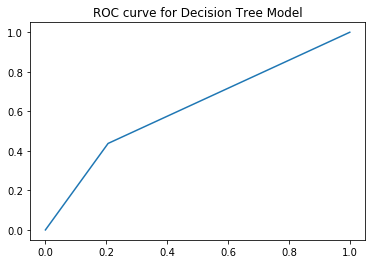

In [92]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_deci)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test, Y_pred_deci))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Decision Tree Model")
plt.show()

In [93]:
cm_deci = pd.crosstab(Y_test, Y_pred_deci, rownames=['True'], colnames=['Predicted'], margins=True)
cm_deci

Predicted,0,1,All
True,,,
0,108,28,136
1,36,28,64
All,144,56,200


In [94]:
cost_deci = cm_deci.iloc[1,0]*5 + cm_deci.iloc[0,1]*1
cost_deci

208

                 variables  importance
11                  cc_age    0.175293
0               over_draft    0.121543
1             credit_usage    0.117612
9          residence_since    0.083685
4   Average_Credit_Balance    0.077039
5               employment    0.068355
2           credit_history    0.054346
6                 location    0.050725
3                  purpose    0.040540
8            other_parties    0.039621
10      property_magnitude    0.035793
14        existing_credits    0.026436
15                     job    0.025541
17           own_telephone    0.024776
12     other_payment_plans    0.023385
13                 housing    0.016926
7          personal_status    0.016697
16          num_dependents    0.001687
18          foreign_worker    0.000000


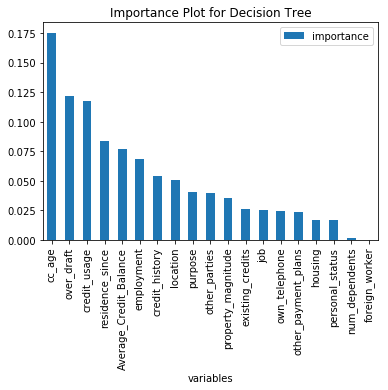

In [95]:
#importance plot for decision tree
importances_dt = decision_tree.feature_importances_
df_dt_imp = pd.DataFrame(X_train.columns)
df_dt_imp['importance'] = importances_dt
df_dt_imp.columns = ['variables','importance']
df_dt_imp.sort_values(by='importance',ascending=False,inplace=True)
print(df_dt_imp)
df_dt_imp.plot(kind="bar",x=df_dt_imp['variables'],title="Importance Plot for Decision Tree")

In [96]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train, Y_train)
Y_pred_rand = random_forest.predict(X_test)

0.662683823529
0.662683823529


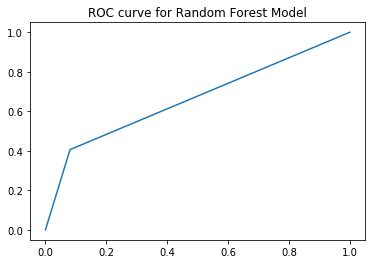

In [97]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_rand)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test, Y_pred_rand))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Random Forest Model")
plt.show()

In [98]:
cm_rand = pd.crosstab(Y_test, Y_pred_rand, rownames=['True'], colnames=['Predicted'], margins=True)
cm_rand

Predicted,0,1,All
True,,,
0,125,11,136
1,38,26,64
All,163,37,200


In [99]:
cost_rand = cm_rand.iloc[1,0]*5 + cm_rand.iloc[0,1]*1
cost_rand

201

                 variables  importance
11                  cc_age    0.118901
1             credit_usage    0.113949
0               over_draft    0.107845
3                  purpose    0.069193
2           credit_history    0.067541
5               employment    0.060657
9          residence_since    0.055970
4   Average_Credit_Balance    0.055030
10      property_magnitude    0.054768
6                 location    0.052760
7          personal_status    0.043399
15                     job    0.039311
12     other_payment_plans    0.033321
13                 housing    0.031185
14        existing_credits    0.028511
17           own_telephone    0.024728
8            other_parties    0.021314
16          num_dependents    0.016987
18          foreign_worker    0.004631


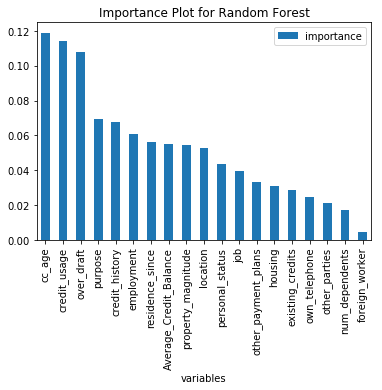

In [100]:
#importance plot for random forest
importances_rf = random_forest.feature_importances_
df_rf_imp = pd.DataFrame(X_train.columns)
df_rf_imp['importance'] = importances_rf
df_rf_imp.columns = ['variables','importance']
df_rf_imp.sort_values(by='importance',ascending=False,inplace=True)
print(df_rf_imp)
df_rf_imp.plot(kind="bar",x=df_rf_imp['variables'],title="Importance Plot for Random Forest")

## Analysis taking only important variables observed after analysing through pivoting

In [101]:
train5 = train[['credit_history','employment','other_parties','property_magnitude','foreign_worker','class']]

In [102]:
test5 = test[['credit_history','employment','other_parties','property_magnitude','foreign_worker','class']]

In [103]:
X_train5 = train5.drop("class", axis=1)
Y_train5 = train5["class"]
X_test5  = test5.drop("class", axis=1)
Y_test5 = test5["class"]
X_train5.shape, Y_train5.shape, X_test5.shape, Y_test5.shape

((800, 5), (800,), (200, 5), (200,))

In [104]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train5, Y_train5)
print(logreg.coef_)
print(logreg.intercept_)
Y_pred_log = logreg.predict(X_test5)

[[-0.47340129 -0.11730596  0.15479774  0.08780774  0.86060665]]
[-0.41122628]


0.5546875
0.5546875


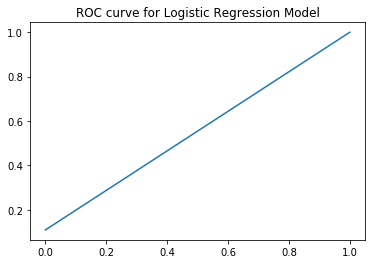

In [105]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test5, Y_pred_log)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test5, Y_pred_log))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Logistic Regression Model")
plt.show()

In [106]:
cm_log = pd.crosstab(Y_test5, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)
cm_log

Predicted,0,1,All
True,,,
0,136,0,136
1,57,7,64
All,193,7,200


In [107]:
cost_log = cm_log.iloc[1,0]*5 + cm_log.iloc[0,1]*1
cost_log

285

In [108]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train5, Y_train5)
Y_pred_dec = decision_tree.predict(X_test5)

Plotting the Decision Tree

graph = Source(export_graphviz(decision_tree, out_file=None, feature_names=X_train5.columns))

SVG(graph.pipe(format='svg'))

Output available in appendix.

0.549632352941
0.549632352941


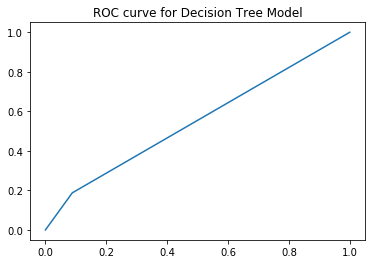

In [109]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test5, Y_pred_dec)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test5, Y_pred_dec))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Decision Tree Model")
plt.show()

In [110]:
cm_dec = pd.crosstab(Y_test5, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)
cm_dec

Predicted,0,1,All
True,,,
0,124,12,136
1,52,12,64
All,176,24,200


In [111]:
cost_dec = cm_dec.iloc[1,0]*5 + cm_dec.iloc[0,1]*1
cost_dec

272

In [112]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train5, Y_train5)
Y_pred_ran = random_forest.predict(X_test5)

0.541819852941
0.541819852941


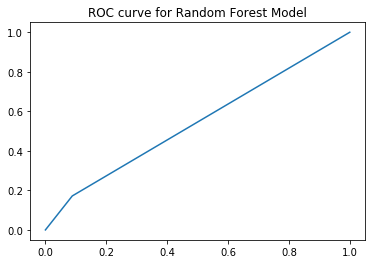

In [113]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test5, Y_pred_ran)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test5, Y_pred_ran))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Random Forest Model")
plt.show()

In [114]:
cm_ran = pd.crosstab(Y_test5, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)
cm_ran

Predicted,0,1,All
True,,,
0,124,12,136
1,53,11,64
All,177,23,200


In [115]:
cost_ran = cm_ran.iloc[1,0]*5 + cm_ran.iloc[0,1]*1
cost_ran

277

## Taking only the important variables by random forest importance

In [116]:
train6 = train[['cc_age','credit_usage','over_draft','credit_history','purpose','employment','class']]

In [117]:
test6 = test[['cc_age','credit_usage','over_draft','credit_history','purpose','employment','class']]

In [118]:
X_train6 = train6.drop("class", axis=1)
Y_train6 = train6["class"]
X_test6  = test6.drop("class", axis=1)
Y_test6 = test6["class"]
X_train6.shape, Y_train6.shape, X_test6.shape, Y_test6.shape

((800, 6), (800,), (200, 6), (200,))

In [119]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train6, Y_train6)
print(logreg.coef_)
print(logreg.intercept_)
Y_pred_lr = logreg.predict(X_test6)

[[-0.00438449  0.03328231  0.30777117 -0.41111206  0.01304143 -0.10635997]]
[-0.44119755]


0.578584558824
0.578584558824


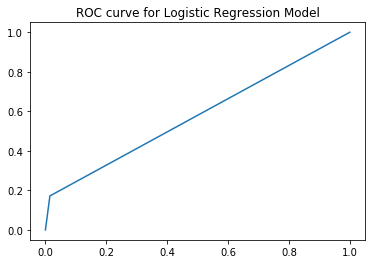

In [120]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test6, Y_pred_lr)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test6, Y_pred_lr))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Logistic Regression Model")
plt.show()

In [121]:
cm_lr = pd.crosstab(Y_test6, Y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)
cm_lr

Predicted,0,1,All
True,,,
0,134,2,136
1,53,11,64
All,187,13,200


In [122]:
cost_lr = cm_lr.iloc[1,0]*5 + cm_lr.iloc[0,1]*1
cost_lr

267

In [123]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train6, Y_train6)
Y_pred_dt = decision_tree.predict(X_test6)

Plotting the Decision Tree

graph = Source(export_graphviz(decision_tree, out_file=None, feature_names=X_train6.columns))

SVG(graph.pipe(format='svg'))

Output available in appendix

0.698529411765
0.698529411765


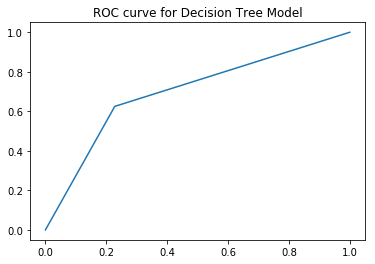

In [124]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test6, Y_pred_dt)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test6, Y_pred_dt))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Decision Tree Model")
plt.show()

In [125]:
cm_dt = pd.crosstab(Y_test6, Y_pred_dt, rownames=['True'], colnames=['Predicted'], margins=True)
cm_dt

Predicted,0,1,All
True,,,
0,105,31,136
1,24,40,64
All,129,71,200


In [126]:
cost_dt = cm_dt.iloc[1,0]*5 + cm_dt.iloc[0,1]*1
cost_dt

151

In [127]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train6, Y_train6)
Y_pred_rf = random_forest.predict(X_test6)

0.728400735294
0.728400735294


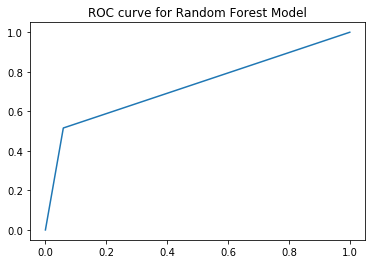

In [128]:
#roc & auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test6, Y_pred_rf)
print (auc(false_positive_rate, true_positive_rate))
print (roc_auc_score(Y_test6, Y_pred_rf))
x = false_positive_rate
y = true_positive_rate
# This is the ROC curve
plt.plot(x,y)
plt.title("ROC curve for Random Forest Model")
plt.show()

In [129]:
cm_rf = pd.crosstab(Y_test6, Y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)
cm_rf

Predicted,0,1,All
True,,,
0,128,8,136
1,31,33,64
All,159,41,200


In [130]:
cost_rf = cm_rf.iloc[1,0]*5 + cm_rf.iloc[0,1]*1
cost_rf

163

## Automating by creating a function

Now that the data is analysed and various statistical models are applied, a function can be created which can be applied every time such analysis has to be done. The function will also help in analysing the same dataset with different set of explanatory variables to know the least cost for prediction. And also few other models could be added later on in the function according to the need of the analyst. This will save time and will help in better prediction while comparing the cost from different models used for prediction.

About the function: The parameters used within the function are train_df- this is to provide the train dataset to the function. test_df- this is to provide the test dataset to the function. response_variable- this is to give the name of the column which has to be predicted (with inverted comma) and which is dependent on the values of the other columns. cost_of_1_predicted_0=1- this is to give the cost of error where 1 value of response variable is predicted as 0. cost_of_0_predicted_1=1- this is to give the cost of error where 0 value of response variable is predicted as 1. By default the cost parameters are set as 1 in order to give equal weightage to both the errors in prediction.

The output of the function: Logistic Regression Model- The output of the function gives the coeficients and intercept of the logistic regression line. Then it shows the AUC score which is converted to percentage and it also plots the ROC curve. Then is shows the confusion matrix and the cost for predicted error. Decision Tree Model- The output shows the AUC score which is converted to percentage and it also plots the ROC curve. Then is shows the confusion matrix and the cost for predicted error. Random Forest Model- The output shows the AUC score which is converted to percentage and it also plots the ROC curve. Then is shows the confusion matrix and the cost for predicted error. After that it shows the table for camparison of all the models on the basis of cost and AUC score. In the end the output plots the importance of variables according to decision tree model and random forest model seperately.

Few assumptions for using the function created: The dataset has be already split into train and test dataframe. The response variable has to have binary values. All the variables in the dataset have to have numeric values. If there are categories, those should be first converted into numeric values before applying the function.

## Function for statistical analysis

In [131]:
def func (train_df,test_df,response_variable,cost_of_1_predicted_0=1,cost_of_0_predicted_1=1):
    X_train_df = train_df.drop(response_variable, axis=1)
    Y_train_df = train_df[response_variable]
    X_test_df  = test_df.drop(response_variable, axis=1)
    Y_test_df = test_df[response_variable]
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train_df, Y_train_df)
    print("The coeficients of logistic regression line are:")
    print(logreg.coef_)
    print(" ")    
    print("The intercept for logistic regression line is:")
    print(logreg.intercept_)
    print(" ")    
    Y_pred_log = logreg.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_log)
    auc_log = roc_auc_score(Y_test_df, Y_pred_log) * 100
    print ("The AUC score for Logistic Regression Model is %2f"%(auc_log))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Logistic Regression Model")
    plt.show()
    cm_lr = pd.crosstab(Y_test_df, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Logistic Regression:")
    print(cm_lr)
    print(" ")
    cost_lr = cm_lr.iloc[1,0]*cost_of_1_predicted_0 + cm_lr.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Lostic Regression Model is %2f"%cost_lr)
    print(" ")    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=100)
    decision_tree.fit(X_train_df, Y_train_df)
    Y_pred_dec = decision_tree.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_dec)
    auc_dec = roc_auc_score(Y_test_df, Y_pred_dec) * 100
    print ("The AUC score for Decision Tree Model is %2f"%(auc_dec))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Decision Tree Model")
    plt.show()
    cm_dt = pd.crosstab(Y_test_df, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Decision Tree:")
    print(cm_dt)
    print(" ")    
    cost_dt = cm_dt.iloc[1,0]*cost_of_1_predicted_0 + cm_dt.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Decision Tree Model is %2f"%cost_dt)
    print(" ")       
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
    random_forest.fit(X_train_df, Y_train_df)
    Y_pred_ran = random_forest.predict(X_test_df)
    #roc & auc score
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_df, Y_pred_ran)
    auc_ran = roc_auc_score(Y_test_df, Y_pred_ran) * 100
    print ("The AUC score for Random Forest Model is %2f"%(auc_ran))
    x = false_positive_rate
    y = true_positive_rate
    # This is the ROC curve
    plt.plot(x,y)
    plt.title("ROC curve for Random Forest Model")
    plt.show()
    print(" ")
    cm_rf = pd.crosstab(Y_test_df, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Random Forest:")
    print(cm_rf)
    print(" ")
    cost_rf = cm_rf.iloc[1,0]*cost_of_1_predicted_0 + cm_rf.iloc[0,1]*cost_of_0_predicted_1
    print("The Cost for Random Forest Model is %2f"%cost_rf)
    print(" ")
    models = pd.DataFrame({'Models':['Logistic Regression', 'Decision Tree', 
              'Random Forest']})
    models['Cost'] = [cost_lr, cost_dt, cost_rf]
    models['auc_score'] = [auc_log, auc_dec, auc_ran]
    print("The cost for various models is as follows:")
    print(models)
    print(" ")
    importances_dt = decision_tree.feature_importances_
    df_dt_imp = pd.DataFrame(X_train_df.columns)
    df_dt_imp['importance'] = importances_dt
    df_dt_imp.columns = ['variables','importance']
    df_dt_imp.sort_values(by='importance',ascending=False,inplace=True)
    print(df_dt_imp.plot(kind="bar",x=df_dt_imp['variables'],title="Importance Plot for Decision Tree"))
    print(" ")
    importances_rf = random_forest.feature_importances_
    df_rf_imp = pd.DataFrame(X_train_df.columns)
    df_rf_imp['importance'] = importances_rf
    df_rf_imp.columns = ['variables','importance']
    df_rf_imp.sort_values(by='importance',ascending=False,inplace=True)
    print(df_rf_imp.plot(kind="bar",x=df_rf_imp['variables'],title="Importance Plot for Random Forest"))
    

The coeficients of logistic regression line are:
[[ 0.28463312  0.03377331 -0.43154865  0.01810301 -0.31258964 -0.14447055
   0.26291386  0.02705024  0.17809431  0.06469972 -0.03207267 -0.00972981
  -0.32597796  0.26655466  0.13763808 -0.02836999  0.16751143  0.19545118
   0.37313506]]
 
The intercept for logistic regression line is:
[-1.23402706]
 
The AUC score for Logistic Regression Model is 64.154412


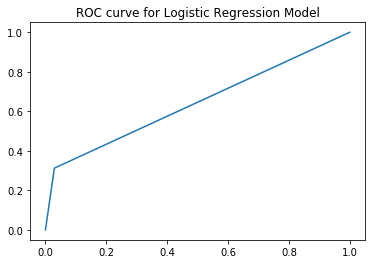

Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          132   4  136
1           44  20   64
All        176  24  200
 
The Cost for Lostic Regression Model is 224.000000
 
The AUC score for Decision Tree Model is 61.580882


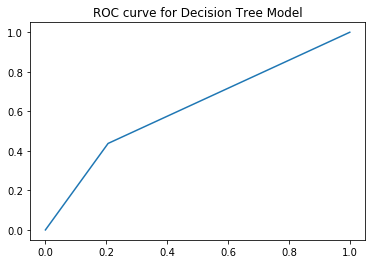

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          108  28  136
1           36  28   64
All        144  56  200
 
The Cost for Decision Tree Model is 208.000000
 
The AUC score for Random Forest Model is 66.268382


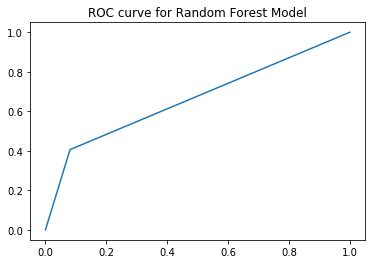

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          125  11  136
1           38  26   64
All        163  37  200
 
The Cost for Random Forest Model is 201.000000
 
The cost for various models is as follows:
                Models  Cost  auc_score
0  Logistic Regression   224  64.154412
1        Decision Tree   208  61.580882
2        Random Forest   201  66.268382
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


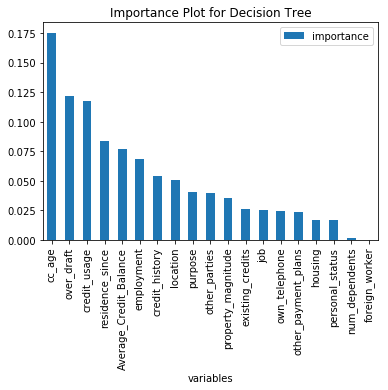

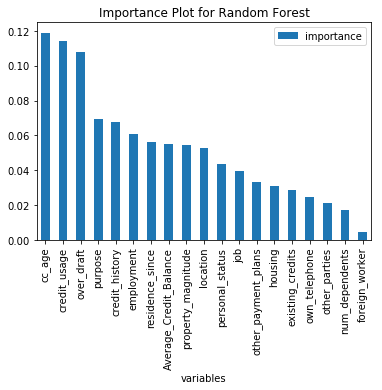

In [132]:
func(train,test,"class",5,1)

The coeficients of logistic regression line are:
[[-0.47340129 -0.11730596  0.15479774  0.08780774  0.86060665]]
 
The intercept for logistic regression line is:
[-0.41122628]
 
The AUC score for Logistic Regression Model is 55.468750


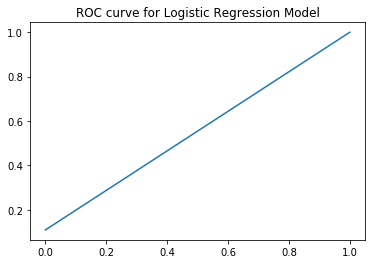

Cost Matrix for Logistic Regression:
Predicted    0  1  All
True                  
0          136  0  136
1           57  7   64
All        193  7  200
 
The Cost for Lostic Regression Model is 285.000000
 
The AUC score for Decision Tree Model is 54.963235


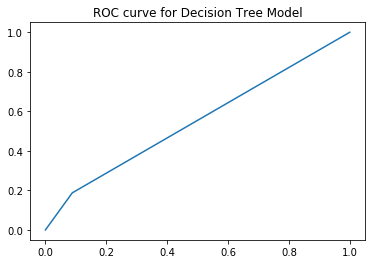

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          124  12  136
1           52  12   64
All        176  24  200
 
The Cost for Decision Tree Model is 272.000000
 
The AUC score for Random Forest Model is 54.181985


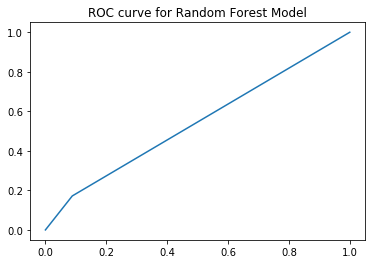

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          124  12  136
1           53  11   64
All        177  23  200
 
The Cost for Random Forest Model is 277.000000
 
The cost for various models is as follows:
                Models  Cost  auc_score
0  Logistic Regression   285  55.468750
1        Decision Tree   272  54.963235
2        Random Forest   277  54.181985
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


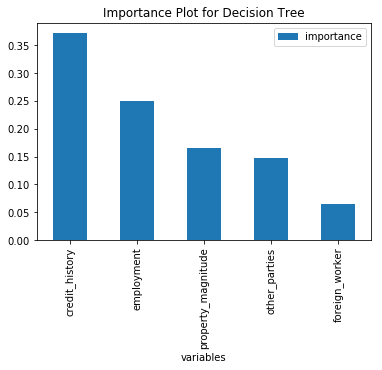

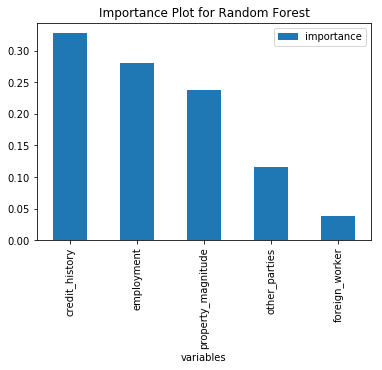

In [133]:
func(train5,test5,"class",5,1)

The coeficients of logistic regression line are:
[[-0.00438449  0.03328231  0.30777117 -0.41111206  0.01304143 -0.10635997]]
 
The intercept for logistic regression line is:
[-0.44119755]
 
The AUC score for Logistic Regression Model is 57.858456


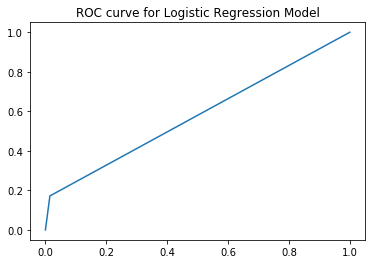

Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          134   2  136
1           53  11   64
All        187  13  200
 
The Cost for Lostic Regression Model is 267.000000
 
The AUC score for Decision Tree Model is 69.852941


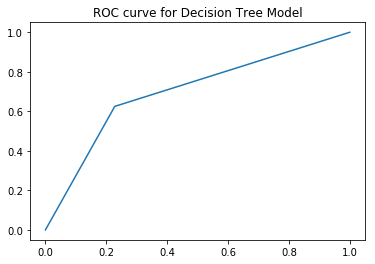

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          105  31  136
1           24  40   64
All        129  71  200
 
The Cost for Decision Tree Model is 151.000000
 
The AUC score for Random Forest Model is 72.840074


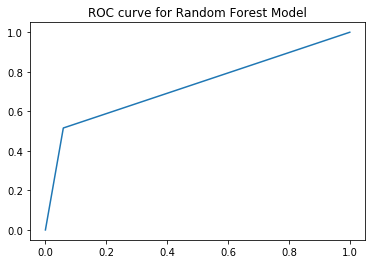

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          128   8  136
1           31  33   64
All        159  41  200
 
The Cost for Random Forest Model is 163.000000
 
The cost for various models is as follows:
                Models  Cost  auc_score
0  Logistic Regression   267  57.858456
1        Decision Tree   151  69.852941
2        Random Forest   163  72.840074
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


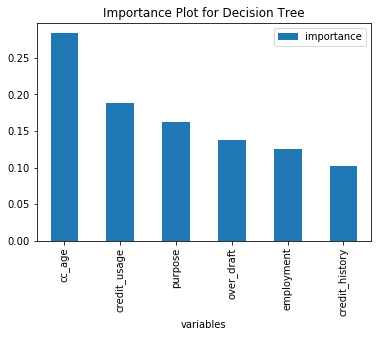

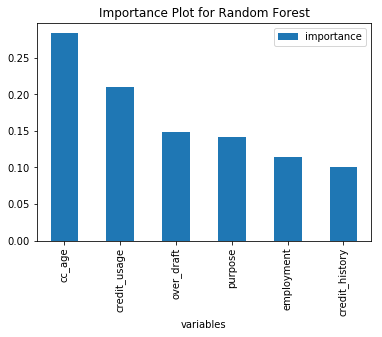

In [134]:
func(train6,test6,"class",5,1)

## Taking only the important variables by decision tree importance

Function demo on set of variables other than the ones used before creating the function. This shows how easily the models can be re-applied on different set of variables from the dataset in just three line of code.

The coeficients of logistic regression line are:
[[-0.00954852  0.32320977  0.03728014  0.10341725 -0.30092066 -0.15518216]]
 
The intercept for logistic regression line is:
[-1.33376608]
 
The AUC score for Logistic Regression Model is 59.007353


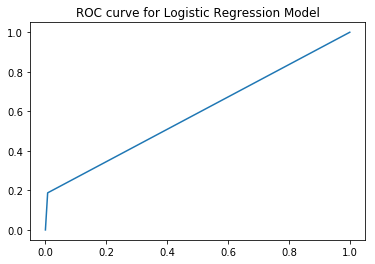

Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          135   1  136
1           52  12   64
All        187  13  200
 
The Cost for Lostic Regression Model is 261.000000
 
The AUC score for Decision Tree Model is 62.454044


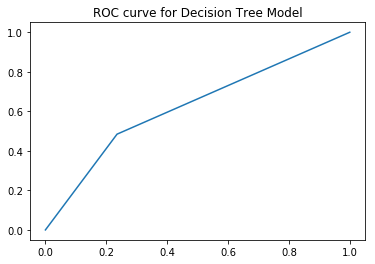

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          104  32  136
1           33  31   64
All        137  63  200
 
The Cost for Decision Tree Model is 197.000000
 
The AUC score for Random Forest Model is 61.718750


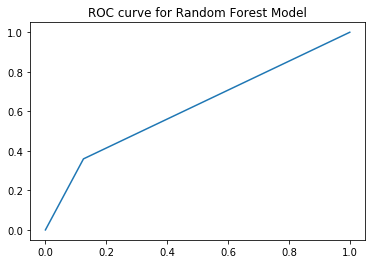

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          119  17  136
1           41  23   64
All        160  40  200
 
The Cost for Random Forest Model is 222.000000
 
The cost for various models is as follows:
                Models  Cost  auc_score
0  Logistic Regression   261  59.007353
1        Decision Tree   197  62.454044
2        Random Forest   222  61.718750
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


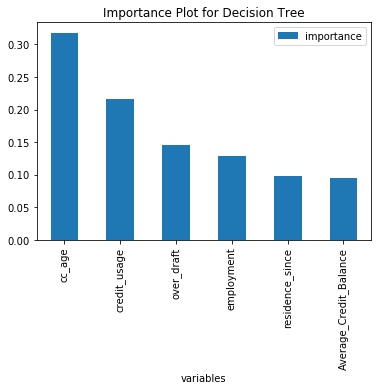

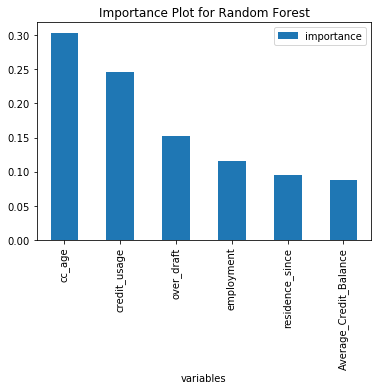

In [135]:
train_dt = train[['cc_age','over_draft','credit_usage','residence_since','Average_Credit_Balance','employment','class']]
test_dt = test[['cc_age','over_draft','credit_usage','residence_since','Average_Credit_Balance','employment','class']]
func(train_dt,test_dt,"class",5,1)

## Testing the function on another dataset (bankloan.csv)

In [136]:
df_bnk = pd.read_csv('/Users/admin/gitproject/bankloan.csv')

In [137]:
df_bnk.head(1)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1


In [138]:
train_df_bnk, test_df_bnk = train_test_split(df_bnk, test_size=0.2)

The coeficients of logistic regression line are:
[[ 0.02584766  0.07421082 -0.27454853 -0.10258501 -0.0094432   0.05314233
   0.62694244  0.11370625]]
 
The intercept for logistic regression line is:
[-1.13099244]
 
The AUC score for Logistic Regression Model is 73.524009


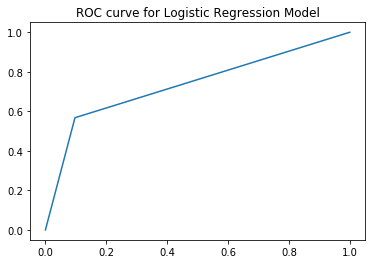

Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0           93  10  103
1           16  21   37
All        109  31  140
 
The Cost for Lostic Regression Model is 26.000000
 
The AUC score for Decision Tree Model is 58.239307


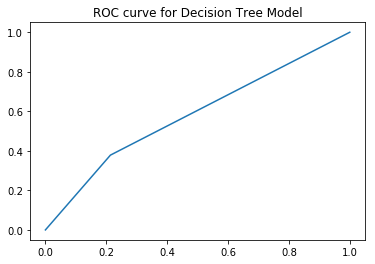

Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0           81  22  103
1           23  14   37
All        104  36  140
 
The Cost for Decision Tree Model is 45.000000
 
The AUC score for Random Forest Model is 68.118604


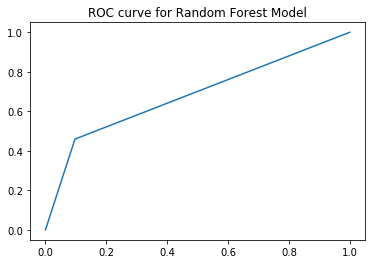

 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0           93  10  103
1           20  17   37
All        113  27  140
 
The Cost for Random Forest Model is 30.000000
 
The cost for various models is as follows:
                Models  Cost  auc_score
0  Logistic Regression    26  73.524009
1        Decision Tree    45  58.239307
2        Random Forest    30  68.118604
 
Axes(0.125,0.125;0.775x0.755)
 
Axes(0.125,0.125;0.775x0.755)


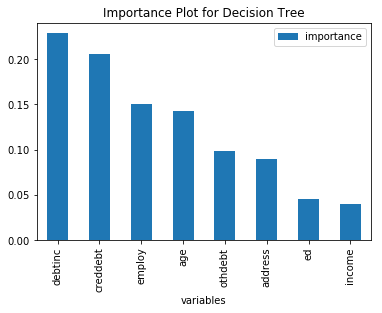

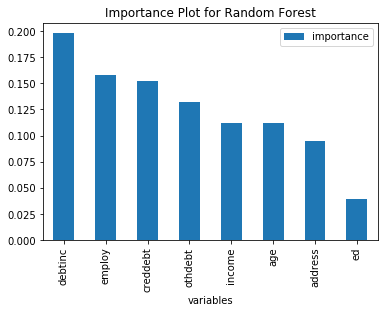

In [139]:
func(train_df_bnk,test_df_bnk,"default")

# Interpretation

For interpretation, the cost is considered as an important factor than accuracy score because the cost matrix for our dataset has a huge difference between the two types of errors which can occur during prediction. The cost multiplied to the error is giving relatively high and low importance to both the errors accordingly, which is not the case with the accuracy score. If a dataset has equal weightage for both the errors, then accuracy score will be considered equally important as cost.

So our analysis shows that the cost of predicted error is lowest for Decision tree model, taking the set of variables, considered important by random forest importance. Namely, 'cc_age','credit_usage','over_draft','credit_history','purpose','employment'.
Therefore it is recommended that the bank manager should decide which new loan applicant to accept or to reject by taking into consideration the predictions based on decision tree model with the above mentioned attributes.